In [1]:
import pandas as pd


In [2]:
X_final=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\8_Encoding\Encoded_data_X.csv")
Y_final=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\8_Encoding\Encoded_data_Y.csv")

In [3]:

import numpy as np


In [4]:
X_final.head()

,price,discount_percent,temp(c),rainfall(mm),weight(kg),warranty(years),productrating,launchyear,stocklevel,supplierdelay(days),...,inventorytype_Returned,season_spring,season_summer,season_winter,daytype_Weekday,daytype_Weekend,rating_category_low,rating_category_medium,isweekend,promocodeused
0,0.162370,2.942124,-0.103262,-0.410981,1.341289,-0.419557,1.388913,-0.288686,-0.776885,-0.814236,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002154,-0.498398,-0.091809,-0.625148,0.060577,1.327591,0.412855,-0.288686,-1.319685,-1.162852,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.002154,-0.498398,1.385551,-0.047545,-0.234418,1.327591,0.412855,0.858066,0.218248,-0.814236,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002154,-0.498398,-0.847668,-0.631638,1.247754,1.327591,0.552292,0.858066,1.159101,-0.814236,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002154,-0.498398,0.480811,-0.436940,1.089464,1.327591,-1.678697,-0.288686,-0.650232,0.580229,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [5]:
Y_final['unit_bin'].head()

0    2
1    2
2    1
3    1
4    2
Name: unit_bin, dtype: int64

In [6]:
# 📌 Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# If it's a regression task, you may need to binarize or categorize unitssold:
# Example for binary classification (change as needed):
# y = (df['unitssold'] > threshold_value).astype(int)

# 💡 Convert categorical columns (if not already encoded)
X=X_final
y=Y_final

# 🔄 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 🚀 Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 📊 Predictions
y_pred = logreg.predict(X_test)

# 📈 Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\sachi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7871475742951486
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71      5293
           1       0.79      0.80      0.79     45366
           2       0.79      0.79      0.79     51703

    accuracy                           0.79    102362
   macro avg       0.79      0.74      0.76    102362
weighted avg       0.79      0.79      0.79    102362

Confusion Matrix:
 [[ 3340     0  1953]
 [    0 36233  9133]
 [  808  9894 41001]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

x=X_final.drop(columns=['year'])
y=Y_final
# Step 0: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Step 1: Initialize the model

model_new = XGBClassifier()
model = RandomForestClassifier(random_state=42)

# Step 2: Train the model
model.fit(X_train, y_train)
model_new.fit(X_train,y_train)

# Step 3: Predict
y_pred = model.predict(X_test)
y_new_pred=model_new.predict(X_test)

# Step 4: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_new_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\sachi\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7903909653973155
Accuracy: 0.8157324006955706

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.62      0.69      5293
           1       0.79      0.80      0.80     45366
           2       0.79      0.80      0.79     51703

    accuracy                           0.79    102362
   macro avg       0.79      0.74      0.76    102362
weighted avg       0.79      0.79      0.79    102362



In [8]:


# Assuming model is already trained and called 'model'
feature_importance = model_new.feature_importances_

# Step 2: Create DataFrame with features and their importance
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': feature_importance
})

# Step 3: Sort by importance (ascending)
importance_df_sorted = importance_df.sort_values(by='importance', ascending=True).reset_index(drop=True)

# Step 4: Store all features in a list (already sorted by importance)
sorted_features = importance_df_sorted['feature'].tolist()

# Let's display the features with lowest importance
print("Sorted Features (Least Important First):")
print(sorted_features)


Sorted Features (Least Important First):
['daytype_Weekend', 'isweekend', 'rating_category_low', 'promocodeused', 'location_L08', 'location_L06', 'rating_category_medium', 'inventorytype_Returned', 'material_Glass', 'brand_BrandC', 'material_Wood', 'location_L04', 'warehouse_W2', 'category_Home', 'location_L03', 'launchyear', 'category_Electronics', 'location_L05', 'warranty(years)', 'warehouse_W3', 'supplierdelay(days)', 'rainfall(mm)', 'inventorytype_Repaired', 'location_L02', 'brand_BrandB', 'category_Toys', 'inventorytype_Fresh', 'brand_BrandD', 'material_Plastic', 'location_L07', 'location_L10', 'material_Metal', 'weight(kg)', 'location_L09', 'category_Clothing', 'stock_supplier_interaction', 'temp(c)', 'week', 'price', 'daytype_Weekday', 'price_discount_interaction', 'month', 'season_winter', 'productrating', 'adcampaign_tv', 'stocklevel', 'season_spring', 'dayofweek', 'price_diff', 'discount_percent', 'season_summer']


In [9]:
# Drop the least important feature
X_reduced = x.drop(columns=['daytype_Weekend','isweekend','rating_category_low','promocodeused'])

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train again (example with XGBoost)
from xgboost import XGBClassifier
model_new = XGBClassifier()
model_new.fit(X_train, y_train)

# Predict and Evaluate
from sklearn.metrics import accuracy_score

y_pred = model_new.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after dropping '{sorted_features[0]}':", accuracy)


Accuracy after dropping 'daytype_Weekend': 0.8152927844317227


c:\Users\sachi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 Accuracy: 81.38 %

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      7770
           1       0.81      0.82      0.82     68149
           2       0.81      0.82      0.82     77624

    accuracy                           0.81    153543
   macro avg       0.81      0.77      0.79    153543
weighted avg       0.81      0.81      0.81    153543



C:\Users\sachi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


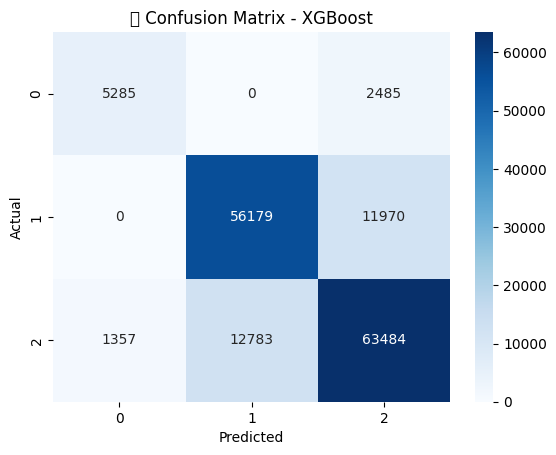

In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x=X_final
y=Y_final


# 📦 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 🚀 Train XGBoost Classifier
clf = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
clf.fit(X_train, y_train)

# 🔮 Predict
y_pred = clf.predict(X_test)

# 📈 Evaluate
acc = accuracy_score(y_test, y_pred)
print("🎯 Accuracy:", round(acc * 100, 2), "%")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 📊 Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - XGBoost")
plt.show()


In [11]:
y.value_counts(normalize=True)


unit_bin
2           0.507568
1           0.442620
0           0.049812
Name: proportion, dtype: float64

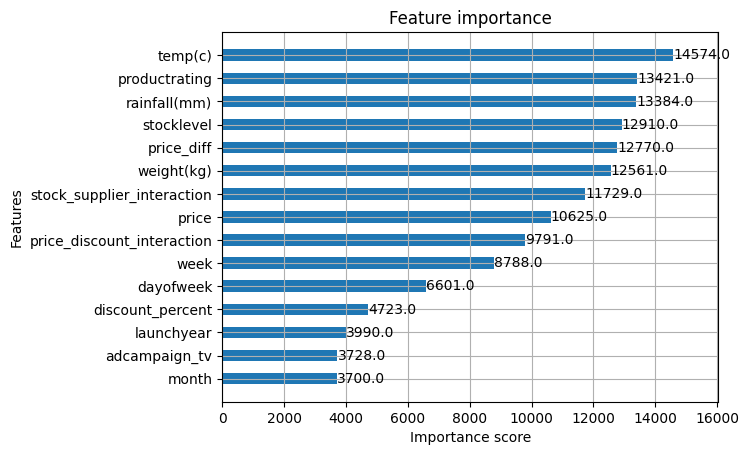

In [12]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(clf, max_num_features=15, height=0.5)
plt.show()


In [23]:
import pickle

In [24]:
pickle.dump(model_new,open('model.pkl','wb'))